In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [4]:
tf.keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train_full[0].shape

(28, 28)

In [10]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


In [12]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [13]:
class_names[y_train[0]]

'Coat'

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [57]:
model = Sequential()

model.add(Flatten(input_shape=[28,28]))
model.output_shape

(None, 784)

In [58]:
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
# This line is tha exact same of the previous line

#model = Sequential([
#    Flatten(input_shape=[28,28]),
#    Dense(300, activation='relu'),
#    Dense(100, activation='relu'),
#    Dense(10, activation='softmax')
#])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.layers

In [59]:
hidden1 = model.layers[1]
hidden1

In [60]:
weights, biases = hidden1.get_weights()

In [61]:
weights

array([[-0.02767802, -0.02615979,  0.00208842, ..., -0.05232339,
         0.0439188 , -0.04568769],
       [-0.03301485, -0.03383781,  0.02787704, ...,  0.00634758,
        -0.03003705,  0.03620335],
       [ 0.01809905,  0.01963653,  0.03281911, ..., -0.0038629 ,
         0.04095163, -0.07148598],
       ...,
       [-0.0247139 , -0.04314153,  0.04653191, ...,  0.03615106,
        -0.04345907, -0.0126428 ],
       [-0.05195534,  0.03307581,  0.01206423, ..., -0.00334516,
         0.01098977, -0.05778872],
       [ 0.03982481, -0.03569672, -0.04573204, ..., -0.01757509,
         0.03442305, -0.05588492]], dtype=float32)

In [62]:
weights.shape

(784, 300)

In [64]:
biases.shape

(300,)

In [66]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [67]:
# This line is tha exact same of the previous line

model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [68]:
import time

In [81]:
start = time.time()
history = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    validation_data=(X_valid, y_valid))
end = time.time()
print('\nTime passed : ', "{:.1f}".format(end - start), 'sn')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 139us/sample - loss: 0.4151 - accuracy: 0.8539 - val_loss: 0.3979 - val_accuracy: 0.8638
Epoch 2/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.3940 - accuracy: 0.8616 - val_loss: 0.3988 - val_accuracy: 0.8620
Epoch 3/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.3783 - accuracy: 0.8658 - val_loss: 0.3706 - val_accuracy: 0.8706
Epoch 4/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.3638 - accuracy: 0.8713 - val_loss: 0.3705 - val_accuracy: 0.8704
Epoch 5/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.3531 - accuracy: 0.8737 - val_loss: 0.3841 - val_accuracy: 0.8642
Epoch 6/30
55000/55000 [==============================] - 7s 135us/sample - loss: 0.3425 - accuracy: 0.8774 - val_loss: 0.3524 - val_accuracy: 0.8774
Epoch 7/30
55000/55000 [===========================

In [82]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [83]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
model_history = pd.DataFrame(history.history)

In [89]:
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.415137,0.853873,0.397883,0.8638
1,0.394007,0.861600,0.398755,0.8620
2,0.378283,0.865836,0.370550,0.8706
3,0.363753,0.871309,0.370539,0.8704
4,0.353070,0.873691,0.384129,0.8642
5,0.342502,0.877418,0.352410,0.8774
6,0.333744,0.881400,0.347478,0.8762
7,0.325281,0.881527,0.349712,0.8726
8,0.318034,0.885982,0.338798,0.8782
9,0.309701,0.888782,0.331755,0.8812


(0, 1)

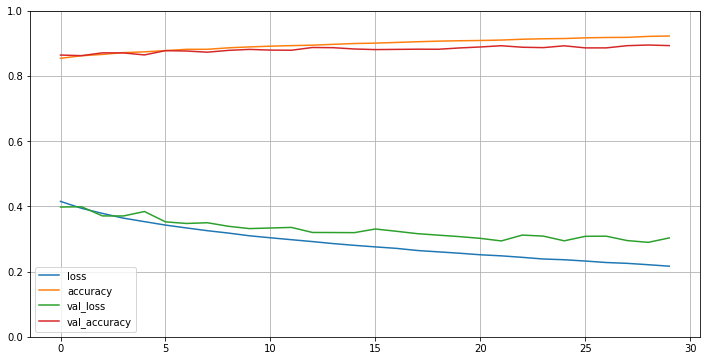

In [95]:
model_history.plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [100]:
model.evaluate(X_test, y_test, verbose=0)

[70.2413201751709, 0.8379]

In [101]:
X_new = X_test[:3]

In [103]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [104]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [117]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [119]:
y_new = y_test[:3]
np.array(class_names)[y_new]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')